In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [405]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) 

Num GPUs Available:  0


In [406]:
df_train = pd.read_csv('C:/Users/winni/Desktop/Classes/DAT555/Titanic/train.csv')
df_test = pd.read_csv('C:/Users/winni/Desktop/Classes/DAT555/Titanic/test.csv')

# Data Dictionary

<b>Survived:</b> Passenger surived or not<br>
<b>PClass:</b> Proxy for Socio-economic status(1 = first class, 2 = second class, 3 = third class) <br>
<b>Sex:</b> Sex of Passenger<br>
<b>Age:</b> Age of Passenger<br>
<b>SibSp:</b> Spouses or Sibling of passenger (Includes Step Siblings)<br>
<b>Parch:</b> Number of Parents and Children (Including stepchildren) children with parch = 0 traveled with nanny<br>
<b>Ticket:</b> Ticket Number of Passenger<br>
<b>Fare:</b> Passenger Fare<br>
<b>Cabin:</b> Cabin number<br>
<b>Embarked:</b> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)<br>


In [407]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [408]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [409]:
passId = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', "Cabin"], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', "Cabin"], axis=1)

In [410]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [411]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [412]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Data Analysis

Added Variables isAlone and Family size:<br>
- FamilySize = SibSp + Parch
- isAlone: 1 = Alone, 0 = Not Alone


<br><br>
<b>PClass:</b> Your economic class influenced whether you survived or not. Upperclass had higher survival rates.<br>
<b>Sex:</b> Females were more likely to survive than males.<br>
<b>isAlone/FamilySize:</b> Passengers with no family were less likely to survive than passengers with any kind of family. However, passengers with family in the range of 1-3 were the likeliest group to survive and passengers with more than 3 family members had even lower rates of survival than people with no family members.<br>
<b>Embarked:</b> Where you embarked from seems to influence survival. May have to do with class system.<br>

In [413]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['isAlone'] = 0
df_train.loc[df_train['FamilySize'] == 0, 'isAlone'] = 1

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['isAlone'] = 0
df_test.loc[df_test['FamilySize'] == 0, 'isAlone'] = 1

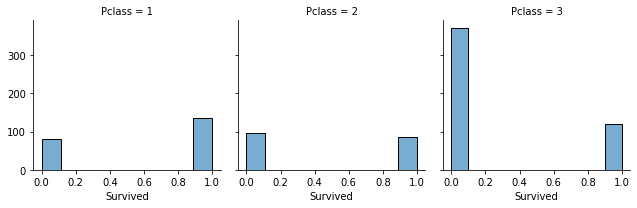

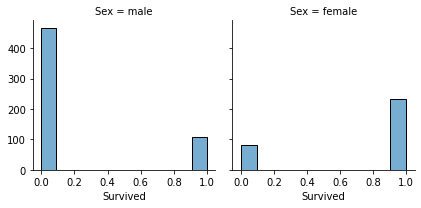

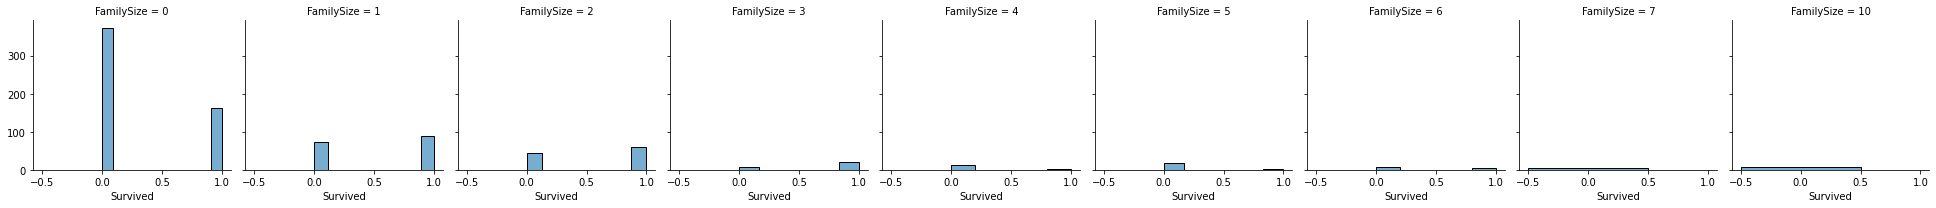

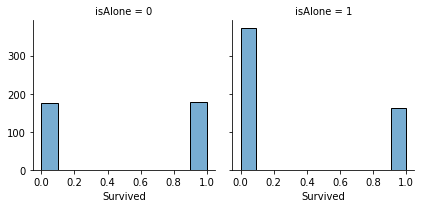

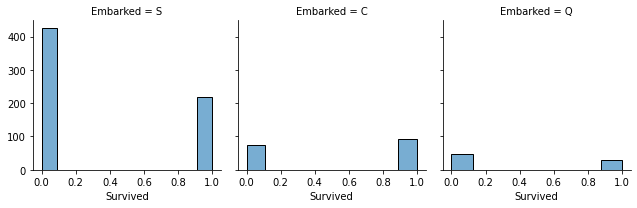

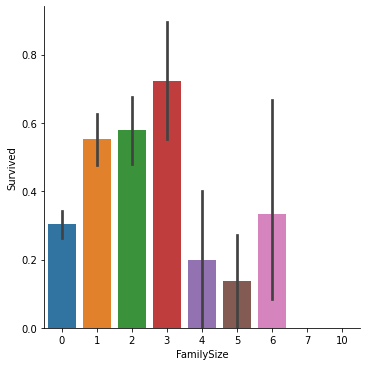

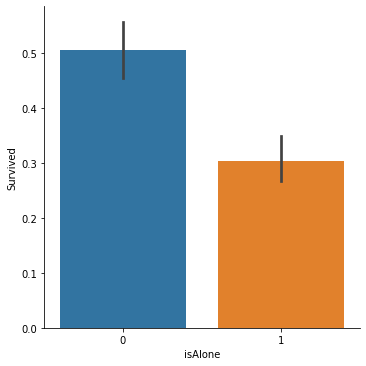

In [414]:
features = [
        "Pclass",
        "Sex",
        "FamilySize",
        "isAlone",
        "Embarked"
    ]

for f in features:
    g = sns.FacetGrid(df_train, col=f)
    g.map(sns.histplot, "Survived", alpha=0.6)

sns.catplot(x="FamilySize", y="Survived", kind="bar", data=df_train)
sns.catplot(x="isAlone", y="Survived", kind="bar", data=df_train)        

#### Age

Age is an interesting attribute when relating to survival. While age was a factor in whether you survived or not, comparing it to sex, pclass, or family size shows a different perspective.

<b>Takeaways</b>
- Children(0-15) and Adults(26-60) are more likely to survive than Young Adults(16-26) and Senior(60+) passenegers.
- Female Passengers increased likelyhood of survival across all age groups and Males had decrease in survival at all age groups.
- Upperclass Passengers increased survival rates at all ages except the senior group.
- Having family aboard(isAlone = 0) increased survival rates at all ages except the senior group, which had a small increase if alone.


In [415]:
df_train['Age_Bin']=pd.cut(x = df_train['Age'],
                        bins = [0,16,26,60,100], 
                        labels = ["Child", "Young_Adult", "Adult","Senior"])

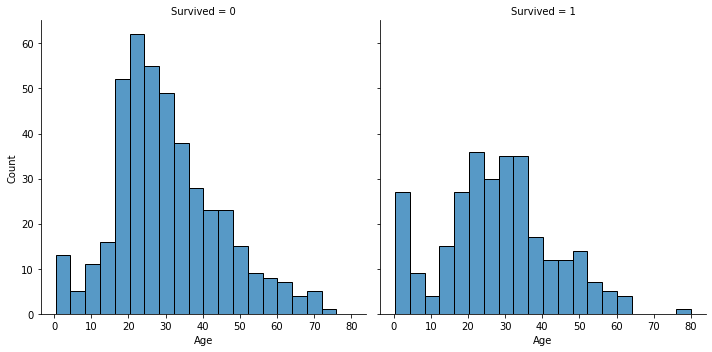

In [416]:
sns.displot(df_train, x="Age", col="Survived")

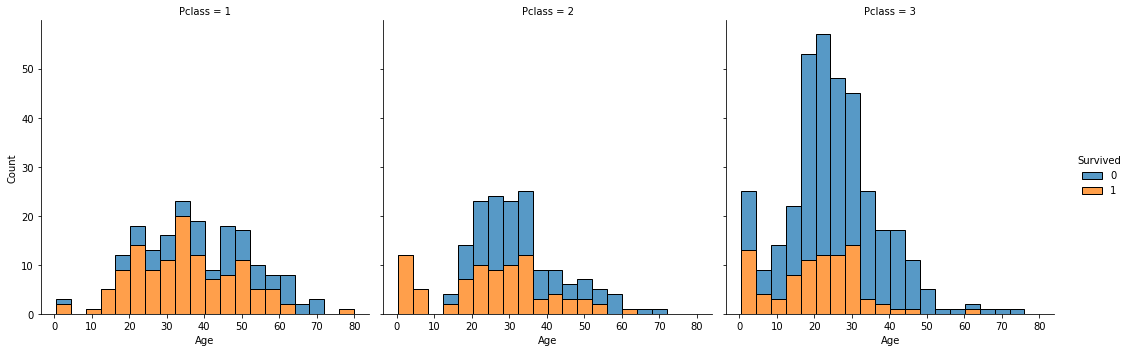

In [417]:
sns.displot(df_train, x="Age", hue="Survived", col="Pclass", multiple = "stack")

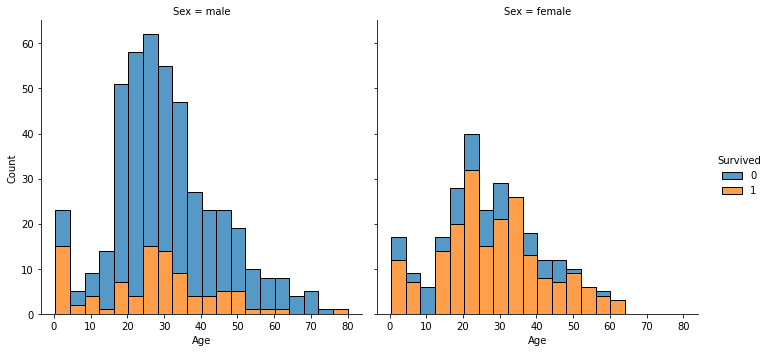

In [418]:
sns.displot(df_train, x="Age", hue="Survived", col="Sex", multiple = "stack")

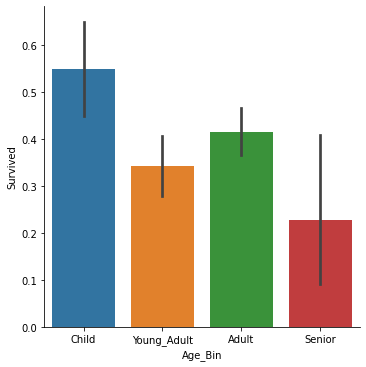

In [419]:
sns.catplot(x="Age_Bin", y="Survived", kind="bar", data=df_train)

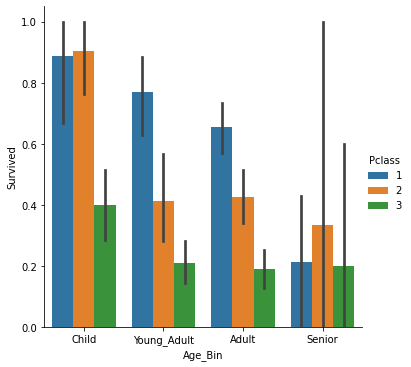

In [420]:
sns.catplot(x="Age_Bin", y="Survived", hue="Pclass", kind="bar", data=df_train)

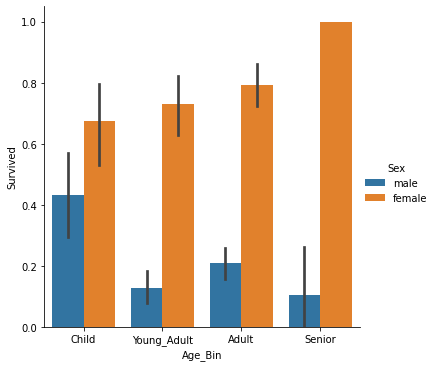

In [421]:
sns.catplot(x="Age_Bin", y="Survived", hue="Sex", kind="bar", data=df_train)

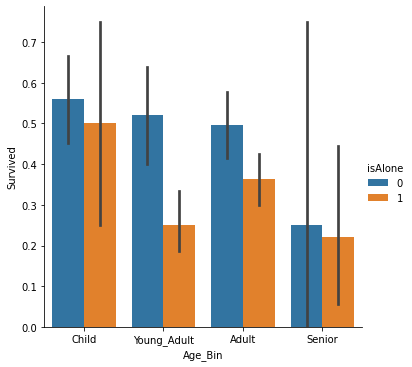

In [422]:
sns.catplot(x="Age_Bin", y="Survived", hue="isAlone", kind="bar", data=df_train)

# Data Cleaning

- Imputed missing Age values with the average age grouped by PClass and Sex.
- The two passengers with missing embarked most likely came from Cherbourg.
- Dropped Age_Bin Column

In [423]:
df_train = df_train.drop(["Age_Bin"], axis=1)

In [424]:
columns = df_test.columns
for i in range(len(columns)):
    print(columns[i],'--->',"train:",df_train[columns[i]].isnull().sum(),
         "|","test:",df_test[columns[i]].isnull().sum()) 

Pclass ---> train: 0 | test: 0
Sex ---> train: 0 | test: 0
Age ---> train: 177 | test: 86
SibSp ---> train: 0 | test: 0
Parch ---> train: 0 | test: 0
Fare ---> train: 0 | test: 1
Embarked ---> train: 2 | test: 0
FamilySize ---> train: 0 | test: 0
isAlone ---> train: 0 | test: 0


In [425]:
df_train['Age'] = df_train.groupby(['Pclass','Sex'], sort=False)['Age'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df_test['Age'] = df_test.groupby(['Pclass','Sex'], sort=False)['Age'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [426]:
df_test['Fare'] = df_test.groupby(['Pclass','Sex'], sort=False)['Age'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [427]:
df_train[df_train['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
61,1,1,female,38.0,0,0,80.0,NaN,0,1
829,1,1,female,62.0,0,0,80.0,NaN,0,1


In [428]:
print(df_train.groupby('Embarked').mean()['Fare'])

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [429]:
print(df_train.groupby('Embarked').mean()['Pclass'])

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64


In [430]:
df_train['Embarked'] = df_train['Embarked'].fillna("C")

# MODEL PREP

In [431]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    object 
 7   FamilySize  418 non-null    int64  
 8   isAlone     418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [432]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   FamilySize  891 non-null    int64  
 9   isAlone     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [433]:
y = df_train.pop('Survived')

In [434]:
label_X_train, label_X_valid, y_train, y_valid = train_test_split(df_train, y, train_size=0.8, test_size=0.2, random_state=0)

In [435]:
cat_features = [
    "Sex",
    "Embarked",
    "Pclass"
]

### Mutual Information

In [436]:
MI_df = df_train.copy()

In [437]:
for colname in MI_df.select_dtypes("object"):
    MI_df[colname], _ = MI_df[colname].factorize()

discrete_features = MI_df.dtypes == int  

In [438]:
MI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   isAlone     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [439]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(MI_df, y, discrete_features)
mi_scores

Sex           0.167041
Fare          0.102707
Pclass        0.049807
isAlone       0.035566
Age           0.033004
Embarked      0.029656
Parch         0.029492
SibSp         0.011181
FamilySize    0.000000
Name: MI Scores, dtype: float64

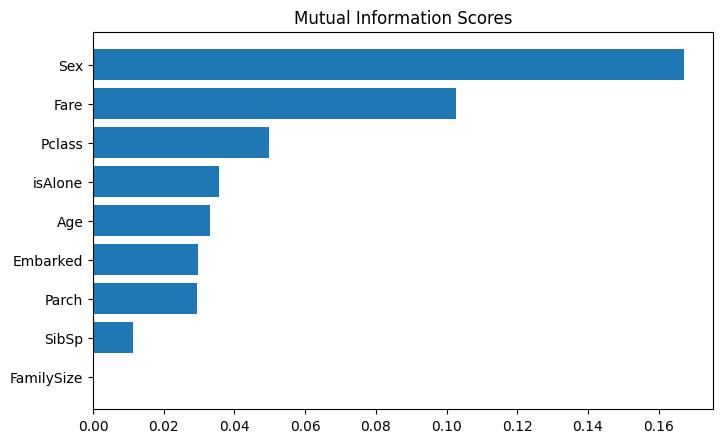

In [440]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

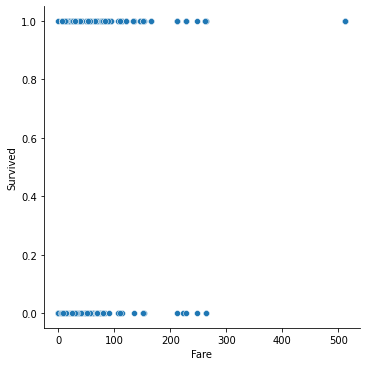

In [441]:
sns.relplot(x=df_train["Fare"], y=y);

# TEST ONE HOT ENCODING

In [442]:
#check dummy variable trap

In [443]:
ohe_train_df = label_X_train.copy()
ohe_valid_df = label_X_valid.copy()
ohe_test_df = df_test.copy()

In [444]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [445]:
ohe_train_cat = pd.DataFrame(OH_encoder.fit_transform(label_X_train[cat_features]))
ohe_valid_cat = pd.DataFrame(OH_encoder.transform(label_X_valid[cat_features]))
ohe_test_cat = pd.DataFrame(OH_encoder.transform(df_test[cat_features]))

ohe_train_cat.index = label_X_train.index
ohe_valid_cat.index = label_X_valid.index
ohe_test_cat.index = df_test.index

ohe_train_cat.columns = OH_encoder.get_feature_names(cat_features)
ohe_valid_cat.columns = OH_encoder.get_feature_names(cat_features)
ohe_test_cat.columns = OH_encoder.get_feature_names(cat_features)

In [446]:
num_X_train = ohe_train_df.drop(cat_features, axis=1)
num_X_valid = ohe_valid_df.drop(cat_features, axis=1)
num_X_test = ohe_test_df.drop(cat_features, axis=1)

In [447]:
OH_X_train = pd.concat([num_X_train, ohe_train_cat], axis=1)
OH_X_valid = pd.concat([num_X_valid, ohe_valid_cat], axis=1)
OH_X_test = pd.concat([num_X_test, ohe_test_cat], axis=1)

In [448]:
OH_X_train

,Age,SibSp,Parch,Fare,FamilySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
140,18.0,0,2,15.2458,2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
439,31.0,0,0,10.5000,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
817,31.0,1,1,37.0042,2,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
378,20.0,0,0,4.0125,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
491,21.0,0,0,7.2500,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,39.0,1,1,83.1583,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
192,19.0,1,0,7.8542,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
629,22.0,0,0,7.7333,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
559,36.0,1,0,17.4000,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [449]:
OH_X_valid

,Age,SibSp,Parch,Fare,FamilySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
495,22.0,0,0,14.4583,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
648,22.0,0,0,7.5500,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
278,7.0,4,1,29.1250,5,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31,35.0,1,0,146.5208,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
255,29.0,0,2,15.2458,2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,13.0,0,0,7.2292,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
837,22.0,0,0,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
215,31.0,1,0,113.2750,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
833,23.0,0,0,7.8542,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [450]:
OH_X_test

,Age,SibSp,Parch,Fare,FamilySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,34.5,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,47.0,1,0,47.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,0,0,62.0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,27.0,0,0,27.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,22.0,1,1,22.0,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,21.0,0,0,21.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
414,39.0,0,0,39.0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
415,38.5,0,0,38.5,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
416,21.0,0,0,21.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# END TEST

# Ordinal Encoder Test

In [451]:
o_train_df = label_X_train.copy()
o_valid_df = label_X_valid.copy()

In [452]:
ordinal_encoder = OrdinalEncoder()
o_train_df[cat_features] = ordinal_encoder.fit_transform(label_X_train[cat_features])
o_valid_df[cat_features] = ordinal_encoder.fit_transform(label_X_valid[cat_features])

In [453]:
o_train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
140,2.0,0.0,18.0,0,2,15.2458,0.0,2,0
439,1.0,1.0,31.0,0,0,10.5000,2.0,0,1
817,1.0,1.0,31.0,1,1,37.0042,0.0,2,0
378,2.0,1.0,20.0,0,0,4.0125,0.0,0,1
491,2.0,1.0,21.0,0,0,7.2500,2.0,0,1
...,...,...,...,...,...,...,...,...,...
835,0.0,0.0,39.0,1,1,83.1583,0.0,2,0
192,2.0,0.0,19.0,1,0,7.8542,2.0,1,0
629,2.0,1.0,22.0,0,0,7.7333,1.0,0,1
559,2.0,0.0,36.0,1,0,17.4000,2.0,1,0


In [454]:
o_valid_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
495,2.0,1.0,22.0,0,0,14.4583,0.0,0,1
648,2.0,1.0,22.0,0,0,7.5500,2.0,0,1
278,2.0,1.0,7.0,4,1,29.1250,1.0,5,0
31,0.0,0.0,35.0,1,0,146.5208,0.0,1,0
255,2.0,0.0,29.0,0,2,15.2458,0.0,2,0
...,...,...,...,...,...,...,...,...,...
780,2.0,0.0,13.0,0,0,7.2292,0.0,0,1
837,2.0,1.0,22.0,0,0,8.0500,2.0,0,1
215,0.0,0.0,31.0,1,0,113.2750,0.0,1,0
833,2.0,1.0,23.0,0,0,7.8542,2.0,0,1


# Drop Categoral Variables Test

In [455]:
drop_train_df = label_X_train.copy()
drop_valid_df = label_X_valid.copy()

In [456]:
drop_train_df = drop_train_df.drop(cat_features, axis=1)
drop_valid_df = drop_valid_df.drop(cat_features, axis=1)

In [457]:
drop_train_df

,Age,SibSp,Parch,Fare,FamilySize,isAlone
140,18.0,0,2,15.2458,2,0
439,31.0,0,0,10.5000,0,1
817,31.0,1,1,37.0042,2,0
378,20.0,0,0,4.0125,0,1
491,21.0,0,0,7.2500,0,1
...,...,...,...,...,...,...
835,39.0,1,1,83.1583,2,0
192,19.0,1,0,7.8542,1,0
629,22.0,0,0,7.7333,0,1
559,36.0,1,0,17.4000,1,0


In [458]:
drop_valid_df

,Age,SibSp,Parch,Fare,FamilySize,isAlone
495,22.0,0,0,14.4583,0,1
648,22.0,0,0,7.5500,0,1
278,7.0,4,1,29.1250,5,0
31,35.0,1,0,146.5208,1,0
255,29.0,0,2,15.2458,2,0
...,...,...,...,...,...,...
780,13.0,0,0,7.2292,0,1
837,22.0,0,0,8.0500,0,1
215,31.0,1,0,113.2750,1,0
833,23.0,0,0,7.8542,0,1


# Random Forest

In [459]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
def score_dataset(X_train, X_valid, y_train, y_valid, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds.flatten().round().astype(int))

In [460]:
#Drop RF Score
print(score_dataset(drop_train_df, drop_valid_df, y_train, y_valid, model))

0.27932960893854747


In [461]:
#Ordinal RF Score
print(score_dataset(o_train_df, o_valid_df, y_train, y_valid, model))

0.15083798882681565


In [462]:
#One hot encoding RF Score
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid, model))

0.15083798882681565


# TEST DATA

In [463]:
preds = model.predict(OH_X_test)

In [464]:
results = pd.DataFrame({
    'PassengerId': passId,  
    'Survived': preds.flatten().round().astype(int),
})

results.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [465]:
results.to_csv('my_submission.csv', index=False)